# Practical 1: IOT and National Accounts
In this exercise, you will practice how to apply the three methods to calculate national GDP, using different databases and years.  
While the exercise is quantitive, try to reason about differences and implications of the methods as well as results from the method application.

### Learning goals

- Analysing GDP trends
- Implementing GDP calculation methods in different contexts
- Understanding the data structure difference between SNA and IO tables 
- Understanding the implications of quantitative results

### Instructions

Data should be downloaded into a data/ folder in the same directory your module is, then it should be loaded and plotted in python

- Data source 1: eurostat, national accounts, main GDP aggregates https://ec.europa.eu/eurostat/web/national-accounts/database

- Data source 2: CBS https://www.cbs.nl/-/media/_excel/2022/27/83-inputoutput-tables-20152021.xlsx

Obtain, plot, and analyze the GDP time series for all years available

## Exercise 1
Using the EUROSTAT data plot a graph showing the yearly GDP change using the following approaches

- expenditure perspective (GDP = Consumption + Investment + Government Spending + Net Export)
- production perspective (GDP = Sum of all value added of all production activities)
- income perspective (GDP = Total National Income + Sales Taxes + Depreciation + Net Foreign Factor Income)

Make sure to use the metadata accompanying the data to help you understand all data available within the CSV file and the GDP elements https://ec.europa.eu/eurostat/cache/metadata/en/nama10_esms.htm

Tip: if you download csv.gz data this is CSV data that has been compressed. You can import it directly into python by using the "compression" argument in the method pd.read_csv()

In [42]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [11]:

plt.style.use('bmh')

gdp = pd.read_csv('data/nama_10_gdp_linear.csv')

gdp.head()

# lets filter the unit

gdp_eur = gdp[gdp.unit =='CP_MEUR']

In [12]:
gdp_eur.head()

,DATAFLOW,LAST UPDATE,freq,unit,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
294388,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B11,AL,1996,-545.8,NaN
294389,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B11,AL,1997,-492.5,NaN
294390,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B11,AL,1998,-575.1,NaN
294391,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B11,AL,1999,-523.0,NaN
294392,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B11,AL,2000,-877.9,NaN


**Print all unique values in the National Account Item column (na_item) to use as a reference**

You can investigate what each code means by checking the vocabulary on the European Environment Agency website 

https://dd.eionet.europa.eu/vocabulary/eurostat/na_item/view

or you can check the statistical terms glossary for full definitions

https://data.un.org/Glossary.aspx

In [31]:
gdp_sort = gdp_eur.sort_values(by = ['na_item', 'geo', 'TIME_PERIOD'], ascending=True)

# we only have countries now where the breakdown is possible.
breakdown_income = ["D1", "B2A3G", "D2X3"]
gdp_break = gdp_sort[gdp_sort.na_item.isin(breakdown_income)]

gdp_break.head()

,DATAFLOW,LAST UPDATE,freq,unit,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
300583,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,AT,1995,68820.9,NaN
300584,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,AT,1996,70372.0,NaN
300585,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,AT,1997,71358.3,NaN
300586,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,AT,1998,74919.5,NaN
300587,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,AT,1999,77865.8,NaN


In [43]:
gdp_inc = gdp_break.groupby(['geo', 'TIME_PERIOD'])['OBS_VALUE'].sum().reset_index()
gdp_inc.head()


,geo,TIME_PERIOD,OBS_VALUE
0,AT,1995,184351.2
1,AT,1996,186968.0
2,AT,1997,187853.6
3,AT,1998,195011.9
4,AT,1999,203850.6


<Axes: xlabel='TIME_PERIOD', ylabel='OBS_VALUE'>

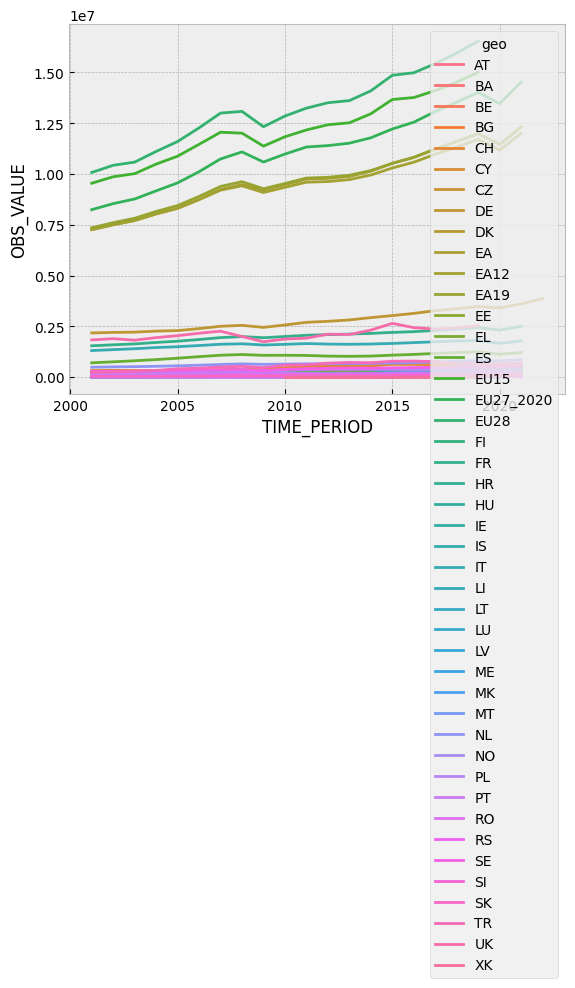

In [46]:
sns.lineplot(gdp_inc[gdp_inc.TIME_PERIOD >2000], x='TIME_PERIOD', y='OBS_VALUE', hue='geo')



<Axes: xlabel='TIME_PERIOD', ylabel='OBS_VALUE'>

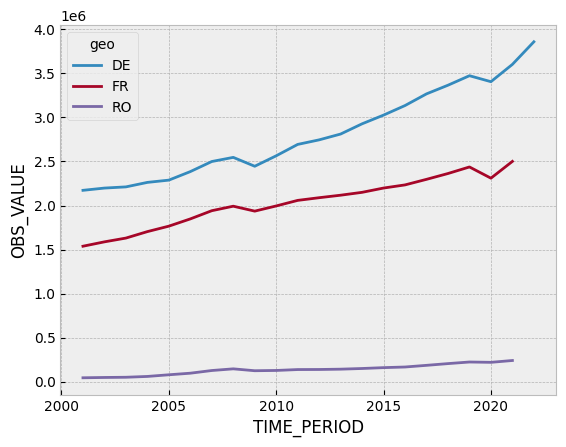

In [47]:
gdp_filt = gdp_inc[gdp_inc.geo.isin(['DE', 'FR', 'RO'])]

sns.lineplot(gdp_filt[gdp_filt.TIME_PERIOD >2000], x='TIME_PERIOD', y='OBS_VALUE', hue='geo')

#### Create a dictionary in which you will store your GDP results for comparison

#### Income approach

Isolate all data for the income approach:
- comp_employees = "D1"
- Gross operating surplus and mixed income = "B2A3G" 
    - gross_operating_surplus = "B2G"
    - mixed_income = "B3G"
- taxes less subsidies on production and imports (D2X3)
    - taxes_less_subsidies = "D2"
    - imports = "D3"


In [56]:
gdp_collection = []

gdp_collection.append(gdp_inc.assign(type='income'))

gdp_collection [0]

,geo,TIME_PERIOD,OBS_VALUE,type
0,AT,1995,184351.2,income
1,AT,1996,186968.0,income
2,AT,1997,187853.6,income
3,AT,1998,195011.9,income
4,AT,1999,203850.6,income
...,...,...,...,...
1177,XK,2015,0.0,income
1178,XK,2016,0.0,income
1179,XK,2017,0.0,income
1180,XK,2018,0.0,income


#### Expenditure approach
Isolate all data for the expenditure approach:
- final_consumption = "P3"
- gross_fixed_capital_form = "P51"
- changes_in_inventories = "P52"
- acquisition_less_disposal_of_val = "P53"
- exports = "P6"
- imports = "P7"

In [64]:
break_expend = ['P3', 'P51', 'P52', 'P53', 'P6', 'P7']
# organize and plot your results for the expenditure approach

def multiply_by_minus_one(row, vars):
    '''

    :param row: row to multiply
    :param vars: set of variables to mult negate
    :return:
    '''
    if row['na_item'] in vars:
        row['OBS_VALUE'] *= -1
    return row

gdp_Exbreak = gdp_sort[gdp_sort.na_item.isin(break_expend)].apply(lambda row: multiply_by_minus_one(row,['P7']), axis=1)

gdp_ex = gdp_Exbreak.groupby(['geo', 'TIME_PERIOD'])['OBS_VALUE'].sum().reset_index()
gdp_ex.head()

,geo,TIME_PERIOD,OBS_VALUE
0,AL,1996,2065.3
1,AL,1997,1639.7
2,AL,1998,1831.4
3,AL,1999,2422.8
4,AL,2000,2616.1


In [58]:
gdp_collection.append(gdp_ex.assign(type='expend'))

#### Production approach

Isolate all data for the production approach:
- total_gross_value_added = "B1G"
- taxes_on_products = "D21"
- subsidies = "D31"


In [67]:
# select national account codes to be isolated in the data 
break_prod = ['B1G', 'D21', 'D31']

gdp_prodBreak = gdp_sort[gdp_sort.na_item.isin(break_prod)].apply(lambda row: multiply_by_minus_one(row,['D31']), axis=1)
gdp_prod = gdp_prodBreak.groupby(['geo', 'TIME_PERIOD'])['OBS_VALUE'].sum().reset_index()
gdp_prod.head()
# Check wether all the items are available in the GDP breakdown csv



,geo,TIME_PERIOD,OBS_VALUE
0,AL,1996,2520.6
1,AL,1997,1967.5
2,AL,1998,2281.8
3,AL,1999,3018.5
4,AL,2000,3780.3


In [68]:

gdp_collection.append(gdp_prod.assign(type='prod'))

In [69]:
gdp_colDf = pd.concat(gdp_collection, axis =0)

,geo,TIME_PERIOD,OBS_VALUE,type
176,DE,1991,1512391.9,income
177,DE,1992,1647737.1,income
178,DE,1993,1768471.4,income
179,DE,1994,1859310.3,income
180,DE,1995,1977604.1,income
...,...,...,...,...
242,DE,2018,3365450.0,prod
243,DE,2019,3473260.0,prod
244,DE,2020,3405430.0,prod
245,DE,2021,3601750.0,prod


<Axes: xlabel='TIME_PERIOD', ylabel='OBS_VALUE'>

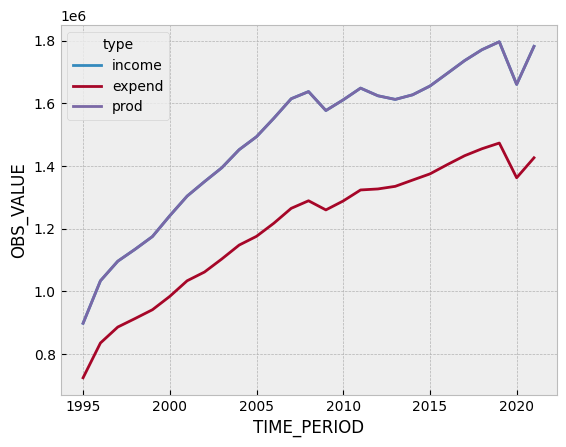

In [77]:
# lets check differences
df_ger = gdp_colDf[gdp_colDf.geo =='IT']

sns.lineplot(df_ger, x='TIME_PERIOD', y='OBS_VALUE', hue='type')

#### Check your results
You don't have to check every single entry, just select one country for each approach, "NL" is fine too

## Exercise 2

Using the CBS data calculate the total GDP total and its composition using the three approaches

Methods can be found using the following link in the file "2 Macroeconomic totals.xlsx" 

https://www.cbs.nl/en-gb/custom/2022/27/national-accounts-2021-tables

Tip: once you download the data have a good look at how it is structure, how the labels are organized.

In order to better understand how GDP can be calculated in IOTs, use the EUROSTAT manual table 11.6 on page 305


![image](./figures/IOT_basic_price.PNG)


In [113]:
# Load the IO data
io = pd.read_excel('data/83 InputOutput tables 20152021.xlsx',
                   sheet_name= "IO-table 2021 current prices",
                   header=1,
                   skipfooter=3
                   )

# Print the list of sheets that are available in the xlsx file so that you can investigate what options you have


def clean_raw(df,
              items_with_neg = ["Subsidies on domestic products (–)","Import subsidies (–)","Other subsidies on production (–)"]):

    df = df.iloc[1:, 1:].fillna(0).set_index('2021*')
    # Labels sometimes have leading and trailing white spaces which makes it difficult to then slice the dataframe
    df.columns = df.columns.str.strip()
    df.index = df.index.str.strip()
    # There could also be errors in labels, always check. It won't matter for this exercise but keep in mind for the future.
    # Examples of mistakes are typos, wrong translaction, encoding issues

    # Negative items
    # Makes sure that the items marked with a negative sign in their labels are indeed negative
    df.loc[(items_with_neg)] = df.loc[items_with_neg] *-1

    # balance check
    total_inputs = df.loc["Total",:"Goods and services n.e.c."].sum()
    total_outputs = df.loc[:"Goods and services n.e.c.","Total"].sum()

    #print(f"Inputs and Outputs match: {total_inputs/total_outputs*100}%")

    return df


In [107]:
clean_raw(io).tail(20)

Inputs and Outputs match: 100.0%


,"Crop, animal production, hunting and related activities",Forestry and logging,Fishing and aquaculture,Extraction of crude petroleum and natural gas,"Other mining and quarrying, except petroleum and gas",Mining support activities,Manufacture of food products,Manufacture of beverages,Manufacture of tobacco products,"Manufacture of textiles, wearing apparel and leather",...,Final consumption expenditure of NPIs serving households,Social transfers in kind,Other individual final consumption of general goevernment,Collective final consumption of general gorvernment,Gross fixed capital formation,Changes in inventories 1),Trade and transport margins,Cif/fob-adjustment and reclassification,Cif/fob-reclassification,Total
2021*,,,,,,,,,,,,,,,,,,,,,
Activities of households as employers of domestic personnel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,977.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,981.0
Goods and services n.e.c.,11.0,0.0,0.0,0.0,0.0,0.0,19.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2069.0
Total of rows (1–81),16250.0,119.0,112.0,1806.0,468.0,552.0,29150.0,1351.0,630.0,1053.0,...,5836.0,88237.0,59937.0,71077.0,118645.0,-1145.0,169049.0,0.0,0.0,0.0
Imports of goods,2650.0,57.0,62.0,25.0,117.0,17.0,22992.0,1060.0,534.0,1252.0,...,0.0,1740.0,0.0,0.0,28883.0,261.0,0.0,-2533.0,-4073.0,485829.0
Imports of services,574.0,12.0,20.0,126.0,56.0,326.0,2039.0,193.0,134.0,178.0,...,0.0,0.0,0.0,0.0,9533.0,0.0,2624.0,0.0,4073.0,136914.0
Import duties,4.0,0.0,1.0,1.0,0.0,1.0,147.0,6.0,5.0,21.0,...,0.0,0.0,0.0,0.0,97.0,-6.0,0.0,0.0,0.0,2933.0
Other taxes on imports,175.0,0.0,1.0,5.0,16.0,0.0,157.0,26.0,9.0,14.0,...,0.0,16.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,10308.0
Taxes on domestic products,469.0,8.0,4.0,5.0,10.0,6.0,171.0,16.0,190.0,10.0,...,0.0,800.0,0.0,0.0,19183.0,0.0,0.0,0.0,0.0,83097.0
Import subsidies (–),-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


#### Parse your data

#### Create a dictionary in which you will store your results to be later compared

In [ ]:
IO_GDP_approaches_results = {"production": None, "income": None, "expenditure": None}

In [146]:
# Production perspective

def gdp_from_io(io):

    prod_items = ["Other taxes on production",
                    "Other subsidies on production (–)",
                    "Wages and salaries",
                    "Employers' social contributions",
                    "Operating surplus (gross)"]

    tax_LesSubItems = ["Import duties", "Other taxes on imports", "Taxes on domestic products", "Import subsidies (–)","Subsidies on domestic products (–)"]

    income_items = ["Wages and salaries",
                "Employers' social contributions",
                "Operating surplus (gross)",
                "Import duties",
                "Taxes on domestic products",
                "Import subsidies (–)",
                "Other taxes on imports",
                "Other taxes on production",
                "Subsidies on domestic products (–)",
                "Other subsidies on production (–)"
                ]

    expenditure_items = ["Exports of goods",
                     "Exports of services",
                     "Final consumption expenditure of households",
                     "Final consumption expenditure of NPIs serving households",
                     "Social transfers in kind",
                     "Other individual final consumption of general goevernment",
                     "Collective final consumption of general gorvernment",
                     "Gross fixed capital formation",
                     "Changes in inventories 1)",
                     "Trade and transport margins",
                     "Cif/fob-adjustment and reclassification",
                     "Cif/fob-reclassification"
                     ]

    imports_items =['Imports of goods',
                'Imports of services']


    io = clean_raw(io)

    gdp_col = {}

    # production = wages + surplus + taxes - subs (rows without expenditures)
    gdp_col['prod']= io.loc[prod_items, :"Goods and services n.e.c."].values.sum() + io.loc[tax_LesSubItems, "Total (1–81)":"Trade and transport margins"].values.sum()



    # income = wages + surplus + taxes  (rows)
    gdp_col['inc']= io.loc[income_items].drop(["Total (1–81)","Total"] ,axis=1).values.sum()

    # expenditures = gross fixed capital formation + export + consumption - import.
    io_ex = io.loc[:, expenditure_items].drop(["Total of rows (1–81)", "Total intermediate consumption (82–90)", "Total", "Value added at basic prices (92–96)"], axis=0)

    # the total import is the import of goods and the import of the expenditure items
    imp = io.loc[imports_items, :"Goods and services n.e.c."].values.sum()+ io.loc[imports_items, expenditure_items].values.sum()

    gdp_col['ex'] = io_ex.values.sum() - imp
    # todo : add reference for comparison = value added.
    return gdp_col



In [147]:
gdp_from_io(io)

{'prod': 856356.0, 'inc': 856356.0, 'ex': 856356.0}

**But wait! What is the value that we obtained from Eurostat and that we see in the macro economic totals documentation of CBS?**

In the CBS IOTs, value added is reported at basic price. We need to add taxes and subtract subsidies to obtain the actual GDP

In [ ]:
# From value added at basic price to actual GDP
taxes_less_subsidies_items = None

taxes_less_subsidies = None

# Add taxes less subsidies
IO_GDP_approaches_results["production"] = None
IO_GDP_approaches_results["production"]

In [ ]:
# Income perspective

income_items = None

income_breakdown = IO_2021_cp.loc[income_items]

# We need to drop the aggregate and totals so that we don't double count 
income_breakdown = None

IO_GDP_approaches_results["income"] = income_breakdown.values.sum()

IO_GDP_approaches_results["income"]

In [ ]:
# Expenditure perspective

expenditure_items = None

imports_items = None

expenditure_breakdown = IO_2021_cp.loc[:, expenditure_items]

# we eliminate the rows with aggregates and totals
expenditure_breakdown = expenditure_breakdown.drop(["Total of rows (1–81)", "Total intermediate consumption (82–90)", "Total", "Value added at basic prices (92–96)"], axis=0)

# We sum all imports to be substracted
imports_Z = None
imports_Y = None
tot_imports = imports_Z + imports_Y

# Subtract imports from expenditure
IO_GDP_approaches_results["expenditure"] = None
IO_GDP_approaches_results["expenditure"]


In [ ]:
# Calculate the production perspective use the Value added row
# we use the value added row provided by the table as a reference to see whether our calculations are correct
value_added = IO_2021_cp.loc["Value added at basic prices (92–96)" , :"Goods and services n.e.c."]
VA_total = value_added.values.sum() + taxes_less_subsidies.values.sum()

for l in IO_GDP_approaches_results:
    print(f"{l} approach results: {IO_GDP_approaches_results[l]} results are off by {round((1-VA_total/IO_GDP_approaches_results[l])*100)}%")
